In [1]:
install.packages("ggplot2",repos="https://cran.r-project.org")

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\puneeth\AppData\Local\Temp\Rtmp8GbAgx\downloaded_packages


In [248]:
library("ggplot2")

In [249]:
library("dplyr")

Cleaning the data:
Step 1:Selecting the required variables from the data frame and renaming them
Step 2:Removing unnecessary rows and values(like 99,98,8,9) which has nothing to do with plotting
Step 3:removing NAs
Step 4:Using cut and groupby functions to create new variables that are required for neat plotting
Step 5:Replacing the label values for 1=high and 5=low by using factor for clear understanding of the graphs.

In [279]:
games<-read.csv("gjb.csv")


ques1: how does internet usage(low or high) vary with age?

In [280]:
game<-setNames(data.frame(games$sex,games$age,games$intfreq),c("sex","age","intfreq"))
names(game)
head(game)
game<-game[game$intfreq!=8 & game$intfreq!=9,]#cleaning the data removing rows cointaining outliers 8 and 9
game<-na.omit(game)#removing NA values
game$cat<-cut(game$age,c(0,18,30,50,70,100))#Cutting the age into different age categories
head(game)

[1] "sex"     "age"     "intfreq"

sex age intfreq
1 2   47   1     
2 2   63   5     
3 2   86  NA     
4 2   40   2     
5 2   65   3     
6 2   69   4

sex age intfreq cat     
1 2   47  1       (30,50] 
2 2   63  5       (50,70] 
4 2   40  2       (30,50] 
5 2   65  3       (50,70] 
6 2   69  4       (50,70] 
9 1   77  3       (70,100]

In [281]:
game$intfreql<-factor(game$intfreq,labels=c("very high","high","avg","low","very low"))

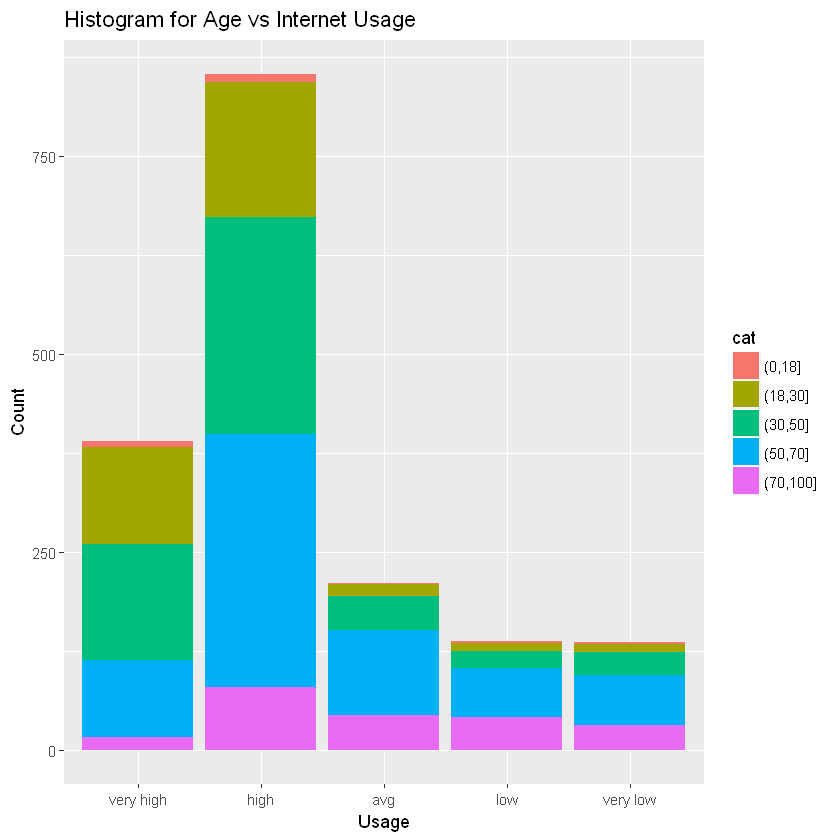

In [282]:
ggplot(game,aes(x=intfreql,fill=cat),xlab="Internet usage")+geom_bar()+labs(title="Histogram for Age vs Internet Usage") +
  labs(x="Usage", y="Count")#+scale_x_continuous(labels=c("veryhigh","high","avg","low","verylow"))

## Online dating based on gender and availability of smartphone

In [283]:
date1a<-select(games,sex,date1a,smart1)#selecting required columns from the original data

In [284]:
head(date1a)

sex date1a smart1
1 2    2      1    
2 2    2      1    
3 2   NA      2    
4 2    2      1    
5 2    2     NA    
6 2    2      1

In [285]:
date1a<-na.omit(date1a)#removing nas from the dataframe

In [286]:
unique(date1a$smart1)# checking for any outliers

[1] 1 2 8 9

In [287]:
date1a<-subset(date1a,date1a!=8 & date1a!=9 & smart1!=8 & smart1!=9)#filtering data requuired by using subset function

In [288]:
class(date1a)
date1a$sex=factor(date1a$sex,labels=c("male","female"))#replacing values to make sense of data like 1=male 2=female 
date1a$date1a=factor(date1a$date1a,labels=c("yes","no"))#factoring data like yes=dated online, no=not dated online
date1a$smart1=factor(date1a$smart1,labels=c("smartphone","nosmartphone"))

[1] "data.frame"

## Histogram for online dating for men and women depending on smartphone ownership

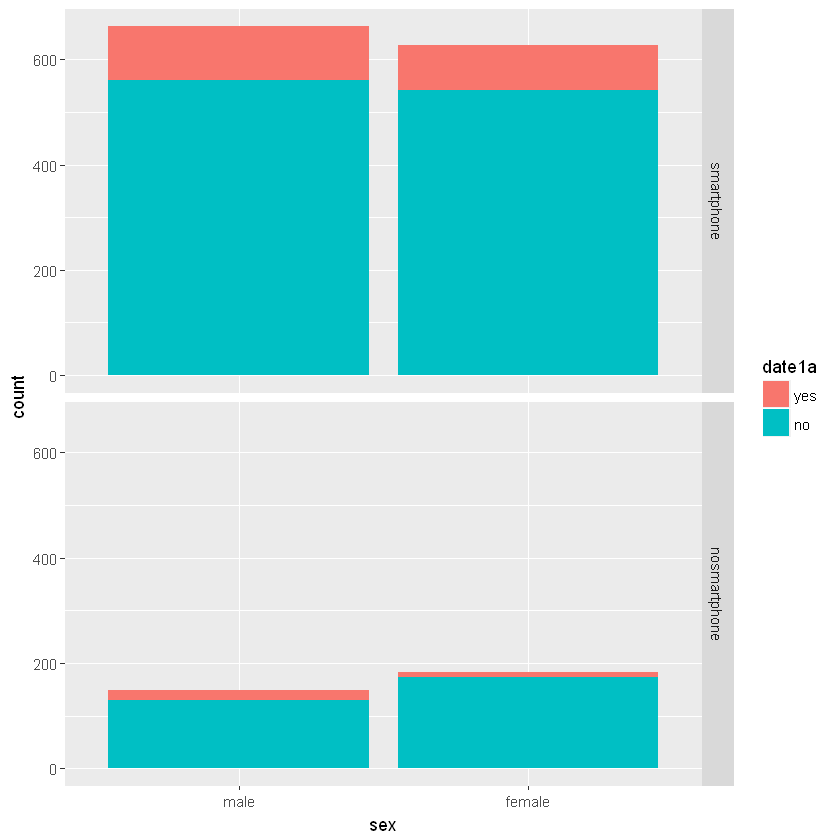

In [289]:
qplot(sex, data=date1a,geom="bar", fill=date1a, facets=smart1~.) #plotting

# Smooth curve for Age and Internet Usage

Warning message:
"Ignoring unknown parameters: breaks"`geom_smooth()` using method = 'gam'


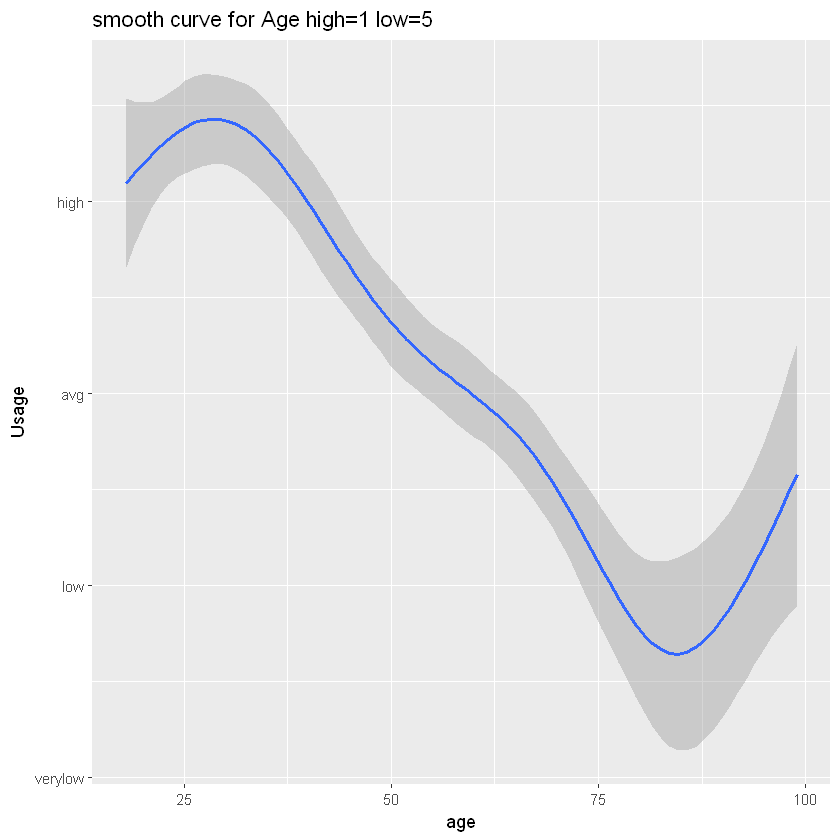

In [290]:
ggplot(game,aes(x=age,y=intfreq))+geom_smooth(breaks=c(5:1))+scale_y_reverse(labels=c("veryhigh","high","avg","low","verylow"))+labs(title="smooth curve for Age high=1 low=5") +
  labs(x="age", y="Usage")

In [291]:
smart1<-setNames(data.frame(games$age,games$educ2,games$inc,games$sex,games$smart1),c("age","educ2","inc","gender","phone"))
names(smart1)
dim(smart1)


[1] "age"    "educ2"  "inc"    "gender" "phone"

[1] 2001    5

In [292]:
unique(smart1$phone)
smart2<-subset(smart1,smart1$educ2!=99 & smart1$educ2!=98 &smart1$inc!=98 & smart1$inc!=99 & phone!=8 & phone!=9)
smart2$agecat<-cut(smart2$age,c(0,18,30,50,70,100))
smart2$inccat<-cut(smart2$inc,c(1,3,5,7,9))
unique(smart2$gender)
names(smart2)

[1]  1  2 NA  8  9

[1] 2 1

[1] "age"    "educ2"  "inc"    "gender" "phone"  "agecat" "inccat"

In [293]:
smart2<-na.omit(smart2)

In [294]:
smart2$phone<-factor(smart2$phone,labels=c("smartphone","normal phone"))
smart2$gender<-factor(smart2$gender,labels=c("Men","Women"))
smart2$inccat<-factor(smart2$inccat,labels=c("<30k","30k-50k","50k-90k",">120k"))

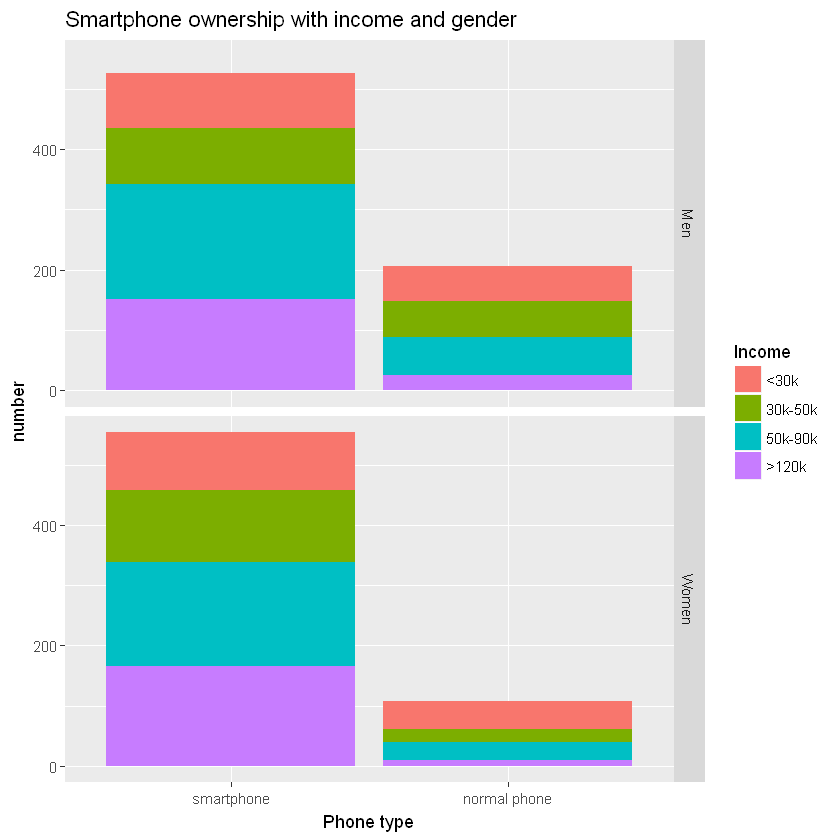

In [295]:
ggplot(smart2)+geom_bar(aes(x=smart2$phone,fill=smart2$inccat))+geom_bar(aes(x=smart2$phone,fill=smart2$inccat))+facet_grid(smart2$gender~.)+labs(title="Smartphone ownership with income and gender",x="Phone type",y="number",fill="Income")


In [296]:
smart2$incc<-factor(smart2$inccat,labels=c("<30k","30k-50k","50k-90k",">120k"))

`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'


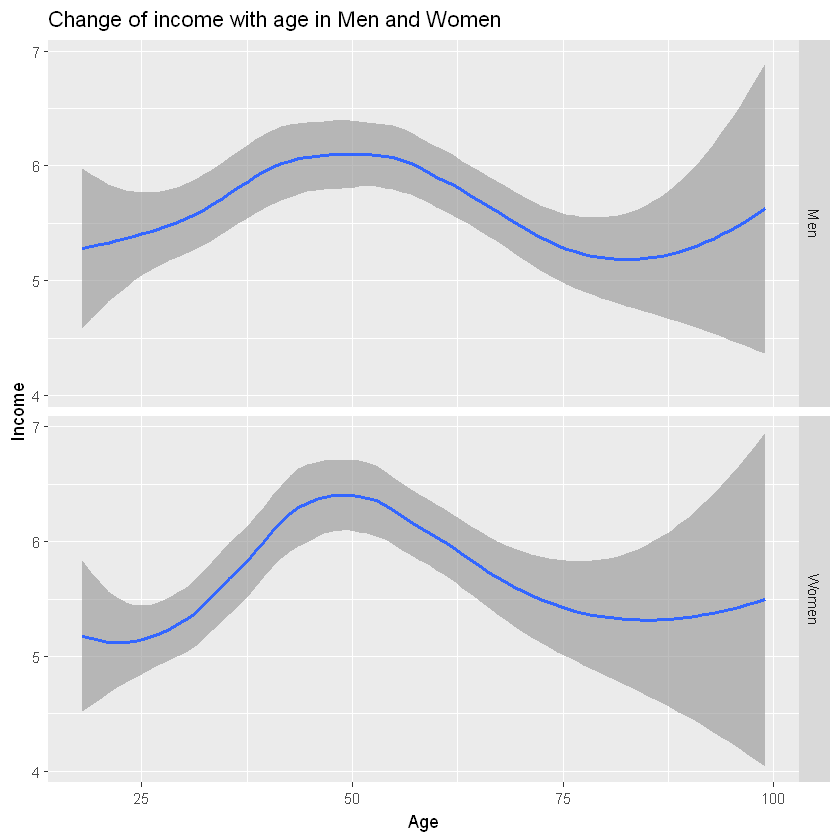

In [297]:
ggplot(smart2)+geom_smooth(aes(x=smart2$age,y=smart2$inc))+geom_smooth(aes(x=smart2$age,y=smart2$inc))+facet_grid(smart2$gender~.)+labs(title="Change of income with age in Men and Women",x="Age",y="Income")

`geom_smooth()` using method = 'loess'


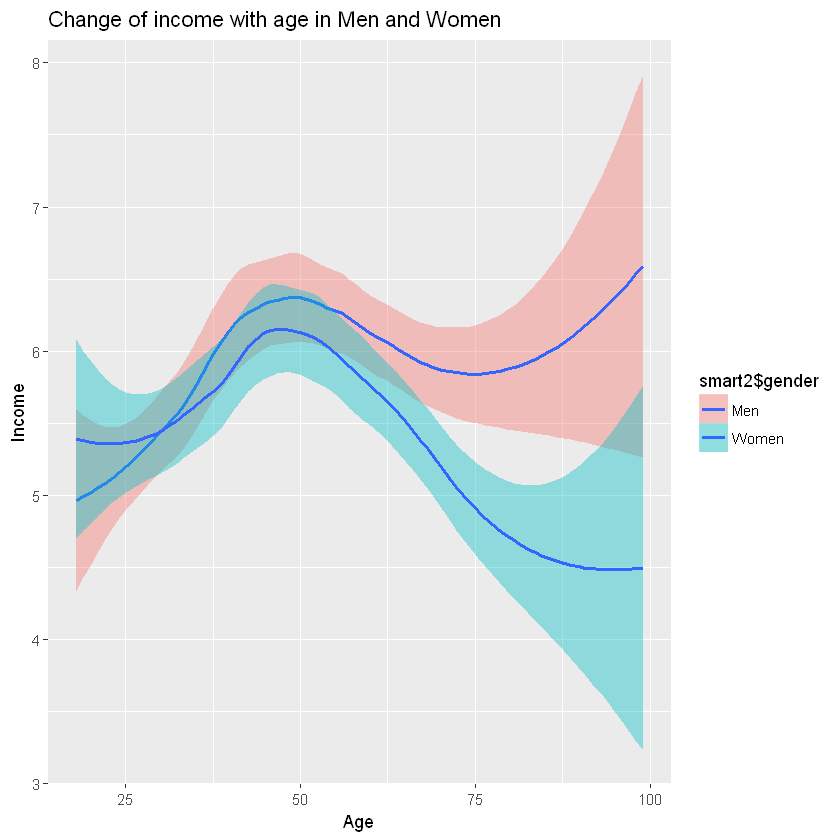

In [298]:
ggplot(smart2)+geom_smooth(aes(x=smart2$age,y=smart2$inc,fill=smart2$gender))+labs(title="Change of income with age in Men and Women",x="Age",y="Income")

In [299]:
emp<-select(games,educ2,emplnw,age)

In [300]:
emp<-emp[emp$educ2!=99&emp$educ2!=98,]
emp<-emp[emp$emplnw!=99&emp$emplnw!=98,]

In [301]:
emp<-na.omit(emp)

In [302]:
head(emp)

educ2 emplnw age
1 6     4      47 
2 4     3      63 
3 1     3      86 
4 5     1      40 
5 4     3      65 
6 6     2      69

In [303]:
emp$educ2<-factor(emp$educ2,labels=c("<high school","high school inc","high school grad","com coll","2-y deg","Undergrad","MS","phd"))

In [304]:
unique(emp$emplnw)

[1] 4 3 1 2 6 5 8 7

In [305]:
emp$emplnw<-factor(emp$emplnw,labels=c("full-time","part-time","retired","no-pay-emp","self-emp","disabled","student","other"))

In [306]:
unique(emp$emplnw)

[1] no-pay-emp retired    full-time  part-time  disabled   self-emp   other     
[8] student   
8 Levels: full-time part-time retired no-pay-emp self-emp disabled ... other

## Employment based on Education and age  

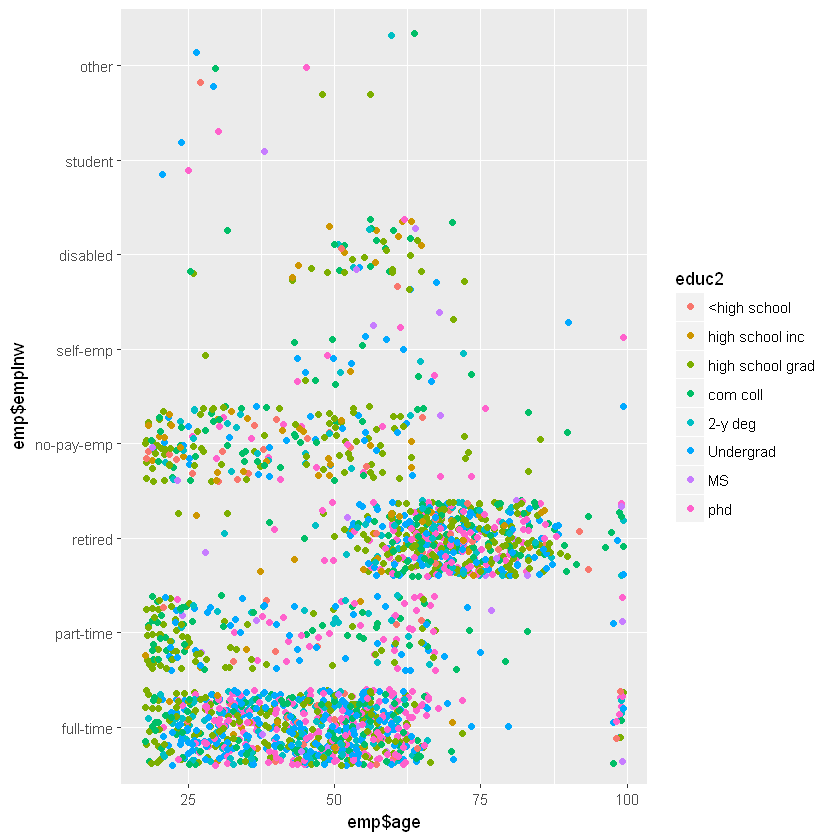

In [307]:
qplot(emp$age,emp$emplnw,colour=educ2,data=emp,geom="jitter")